<a href="https://colab.research.google.com/github/pratik-chakraborty10/Reinforcement-Learning_ML/blob/main/Upper_Confidence_Bound_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
dataset=pd.read_csv(" UpperConfidenceBound_Facebook.csv")

## Implementation

In [7]:
import math
T = 15000 #total round
num_ads = 10 #number of ads in each round
ads_selected = []
numbers_of_selections = [0] * num_ads
sums_of_rewards = [0] * num_ads
total_reward = 0

for n in range(0, T):
  ad = 0
  max_upper_bound = 0
  for i in range(0, num_ads):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]#calculated UCB average
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) #calculate confidence.
      upper_bound = average_reward + delta_i #calculate the UCB by the previous two calculated values.
    else:
      upper_bound = 1e400 #taking similar value of infinity
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward







## Histogram Visualization

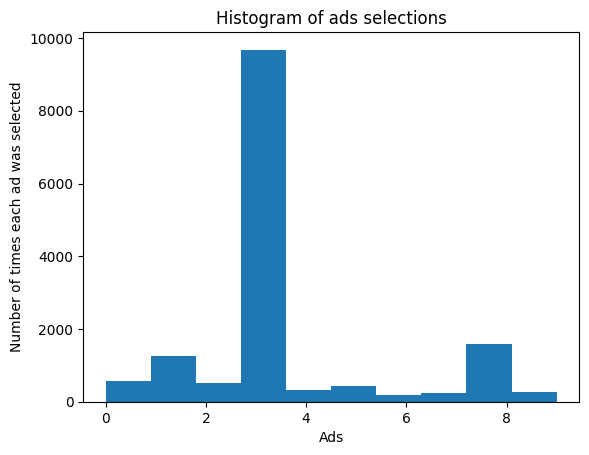

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()